In [76]:
import pandas as pd
import tensorflow as tf
import numpy as np
import scipy.io
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics
from keras.layers.core import Dense, Activation
import pandas
import keras

In [216]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","outcome"]

df = pd.read_csv("kddcup99.csv", header=None, names = col_names)
#df = pd.read_csv("corrected.csv", header=None, names = col_names)

In [217]:
df[['protocol_type']]

,protocol_type
0,tcp
1,tcp
2,tcp
3,tcp
4,tcp
...,...
316585,icmp
316586,icmp
316587,icmp
316588,icmp


In [218]:
#fill in NAN values 
#fill forward, fills in NaN values with the last corressponding value before 
#NaN Value has been reached

df = df.fillna(method='ffill')

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316585,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
316586,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
316587,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
316588,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.


In [219]:
df.groupby('outcome')['outcome'].count()

outcome
back.                 2103
buffer_overflow.        12
ftp_write.               8
guess_passwd.           53
imap.                   12
ipsweep.               862
land.                   17
loadmodule.              8
multihop.                7
neptune.             41122
nmap.                  231
normal.              71225
perl.                    2
phf.                     3
pod.                   102
portsweep.             639
rootkit.                 7
satan.                1587
smurf.              197151
spy.                     2
teardrop.              397
warezclient.          1020
warezmaster.            20
Name: outcome, dtype: int64

In [220]:
#split into features and outcomes

x = df.drop(['outcome','protocol_type','service','flag'], axis = 1 )
y = df[['outcome']]

In [209]:

dummies_1= pd.get_dummies(x['protocol_type'])
dummies_2 = pd.get_dummies(x['service'])
dummies_3 = pd.get_dummies(x['flag'])

#x = x.drop(['protocol_type','service','flag'], axis = 1)

#x = x.join(x)

In [210]:
merged = pandas.concat([x, dummies_1], axis = 'columns')

merged[0:5]

#dummy variable trap 
merged = merged.drop(['icmp'], axis = 1)

In [211]:
merged = pandas.concat([x, dummies_2], axis = 'columns')

merged[0:5]

#dummy variable trap 

merged = merged.drop(['whois'], axis = 1)

In [212]:
merged = pandas.concat([x, dummies_3], axis = 'columns')

merged[0:5]

merged = merged.drop(['SH'], axis = 1)

In [213]:
x = merged

x = x.drop(['protocol_type','service','flag'], axis = 1)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF
0,0,181,5450,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,239,486,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,235,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,219,1337,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,217,2032,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [221]:

# Get column names first
names = x.columns
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit data on the scaler object
scaled_df = scaler.fit_transform(x)
new_scaled_df = pd.DataFrame(scaled_df, columns=names)

x = pd.DataFrame(new_scaled_df)

x[0:5]

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.033283,-0.003424,0.105603,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-3.032335,-2.235529,0.45155,-0.221126,-1.159078,-0.190865,-0.390285,-0.388851,-0.138878,-0.135406
1,-0.033283,-0.003377,-0.017420,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-2.892897,-2.125017,0.45155,-0.221126,-1.287545,-0.190865,-0.390285,-0.388851,-0.138878,-0.135406
2,-0.033283,-0.003380,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-2.753459,-2.014506,0.45155,-0.221126,-1.330368,-0.190865,-0.390285,-0.388851,-0.138878,-0.135406
3,-0.033283,-0.003393,0.003670,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-2.614022,-1.903994,0.45155,-0.221126,-1.330368,-0.190865,-0.390285,-0.388851,-0.138878,-0.135406
4,-0.033283,-0.003394,0.020894,-0.007328,-0.037816,-0.003212,-0.052508,-0.012108,2.017239,-0.007657,...,-2.474584,-1.793483,0.45155,-0.221126,-1.351779,-0.190865,-0.390285,-0.388851,-0.138878,-0.135406


In [215]:
y = y.drop(['outcome'], axis = 1)


In [222]:
# take label column
#labeldf=df['outcome']
# change the label column
#newlabeldf=labeldf.replace({'normal.' : 0, 'neptune.' : 1 ,'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1,'mailbomb.': 1, 'apache2.': 1, 'processtable.': 1, 'udpstorm.': 1, 'worm.': 1,
                          # 'ipsweep.' : 2,'nmap.' : 2,'portsweep.' : 2,'satan.' : 2,'mscan.' : 2,'saint.' : 2
                          # ,'ftp_write.': 2,'guess_passwd.': 2,'imap.': 2,'multihop.': 2,'phf.': 2,'spy.': 2,'warezclient.': 2,'warezmaster.': 2,'sendmail.': 2,'named.': 2,'snmpgetattack.': 2,'snmpguess.': 2,'xlock.': 2,'xsnoop.': 2,'httptunnel.': 2,
                          # 'buffer_overflow.': 2,'loadmodule.': 2,'perl.': 2,'rootkit.': 2,'ps.': 2,'sqlattack.': 2,'xterm.': 2})

#df['outcome'] = newlabeldf
#print(df['outcome'].head())               
                            
                            

In [223]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9.0,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19.0,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39.0,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49.0,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316585,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
316586,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
316587,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.
316588,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.


In [224]:
# take label column
labeldf=df['outcome']
# change the label column
newlabeldf=labeldf.replace({ 'normal.' : 0, 'neptune.' : 1 ,'back.': 1, 'land.': 1, 'pod.': 1, 'smurf.': 1, 'teardrop.': 1, 'apache2.': 1,
                           'ipsweep.' : 2,'nmap.' : 2,'portsweep.' : 2,'satan.' : 2,
                           'ftp_write.': 2,'guess_passwd.': 2,'imap.': 2,'multihop.': 2,'phf.': 2,'spy.': 2,'warezclient.': 2,'warezmaster.': 2,
                           'buffer_overflow.': 2,'loadmodule.': 2,'perl.': 2,'rootkit.': 2})

df['outcome'] = newlabeldf
print(df['outcome'].head())

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64


In [225]:
label_df=df['outcome']
newlabel_df=label_df.replace({ 0 : 'Normal', 1 : 'DoS' , 2 : 'OtherAttacks'})

df['outcome'] = newlabel_df
print(df['outcome'].head())

0    Normal
1    Normal
2    Normal
3    Normal
4    Normal
Name: outcome, dtype: object


In [226]:
df.groupby('outcome')['outcome'].count()

outcome
DoS             240892
Normal           71225
OtherAttacks      4473
Name: outcome, dtype: int64

In [227]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [128]:
#x = principalDf[['principal component 1']].values
#y = principalDf[['principal component 2']].values
#z = principalDf[['principal component 3']].values

In [228]:
principalDf

,principal component 1,principal component 2
0,0.876295,1.520057
1,0.869692,1.498709
2,0.840902,1.471110
3,0.804746,1.442021
4,0.770341,1.412394
...,...,...
316585,-1.620281,-0.516701
316586,-1.620281,-0.516701
316587,-1.620281,-0.516701
316588,-1.620281,-0.516701


In [130]:
#df_outcome = df.groupby('outcome')['outcome'].count()
    
#x_1 = df_outcome[['DoS']]
#y_1 = df_outcome[['Normal']]
#z_1 = df_outcome[['OtherAttacks']]

In [229]:
finalDf = pd.concat([principalDf, df[['outcome']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,outcome
0,0.876295,1.520057,Normal
1,0.869692,1.498709,Normal
2,0.840902,1.471110,Normal
3,0.804746,1.442021,Normal
4,0.770341,1.412394,Normal


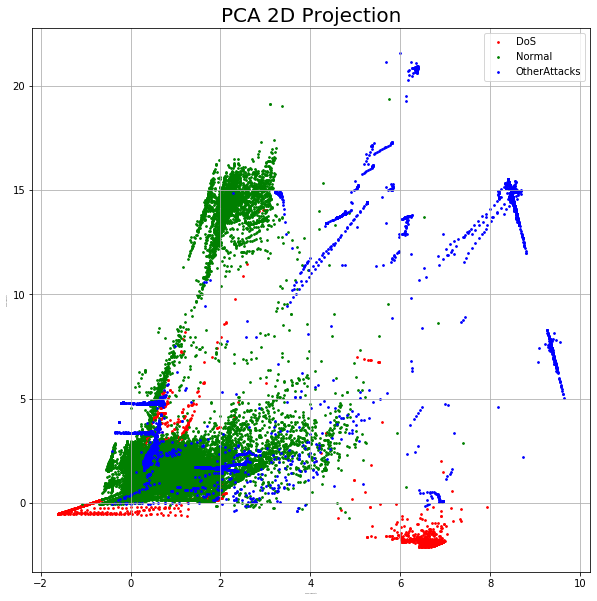

In [241]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 0)
ax.set_ylabel('Principal Component 2', fontsize = 0)
ax.set_title('PCA 2D Projection', fontsize = 20)
targets = ['DoS', 'Normal', 'OtherAttacks']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 3)
ax.legend(targets)
ax.grid()